In [2]:
%matplotlib inline
import os
from PIL import Image
import numpy as np
import cv2
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.widgets import RectangleSelector
from matplotlib.patches import Rectangle
import plotly.express as px
from sklearn.cluster import KMeans
from skimage import morphology
import pandas as pd

In [3]:
#-------------odabranih 30 slika na kojima ce se odsecati templates---------------------
images_path = r'slike_za_template'
images_for_segmentation = []

image_files = [f for f in os.listdir(images_path) if f.endswith('.png')]
for image_file in image_files:
  img = Image.open(os.path.join(images_path, image_file))
  img_array = np.array(img)
  images_for_segmentation.append((image_file, img_array))

def display_images(images, rows=6, cols=5):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
    axes = axes.flatten()

    for i, (filename, img) in enumerate(images):
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(filename, fontsize=8)
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

broj_slika = len(images_for_segmentation)
print(f"Broj slika je: {broj_slika}")

Broj slika je: 30


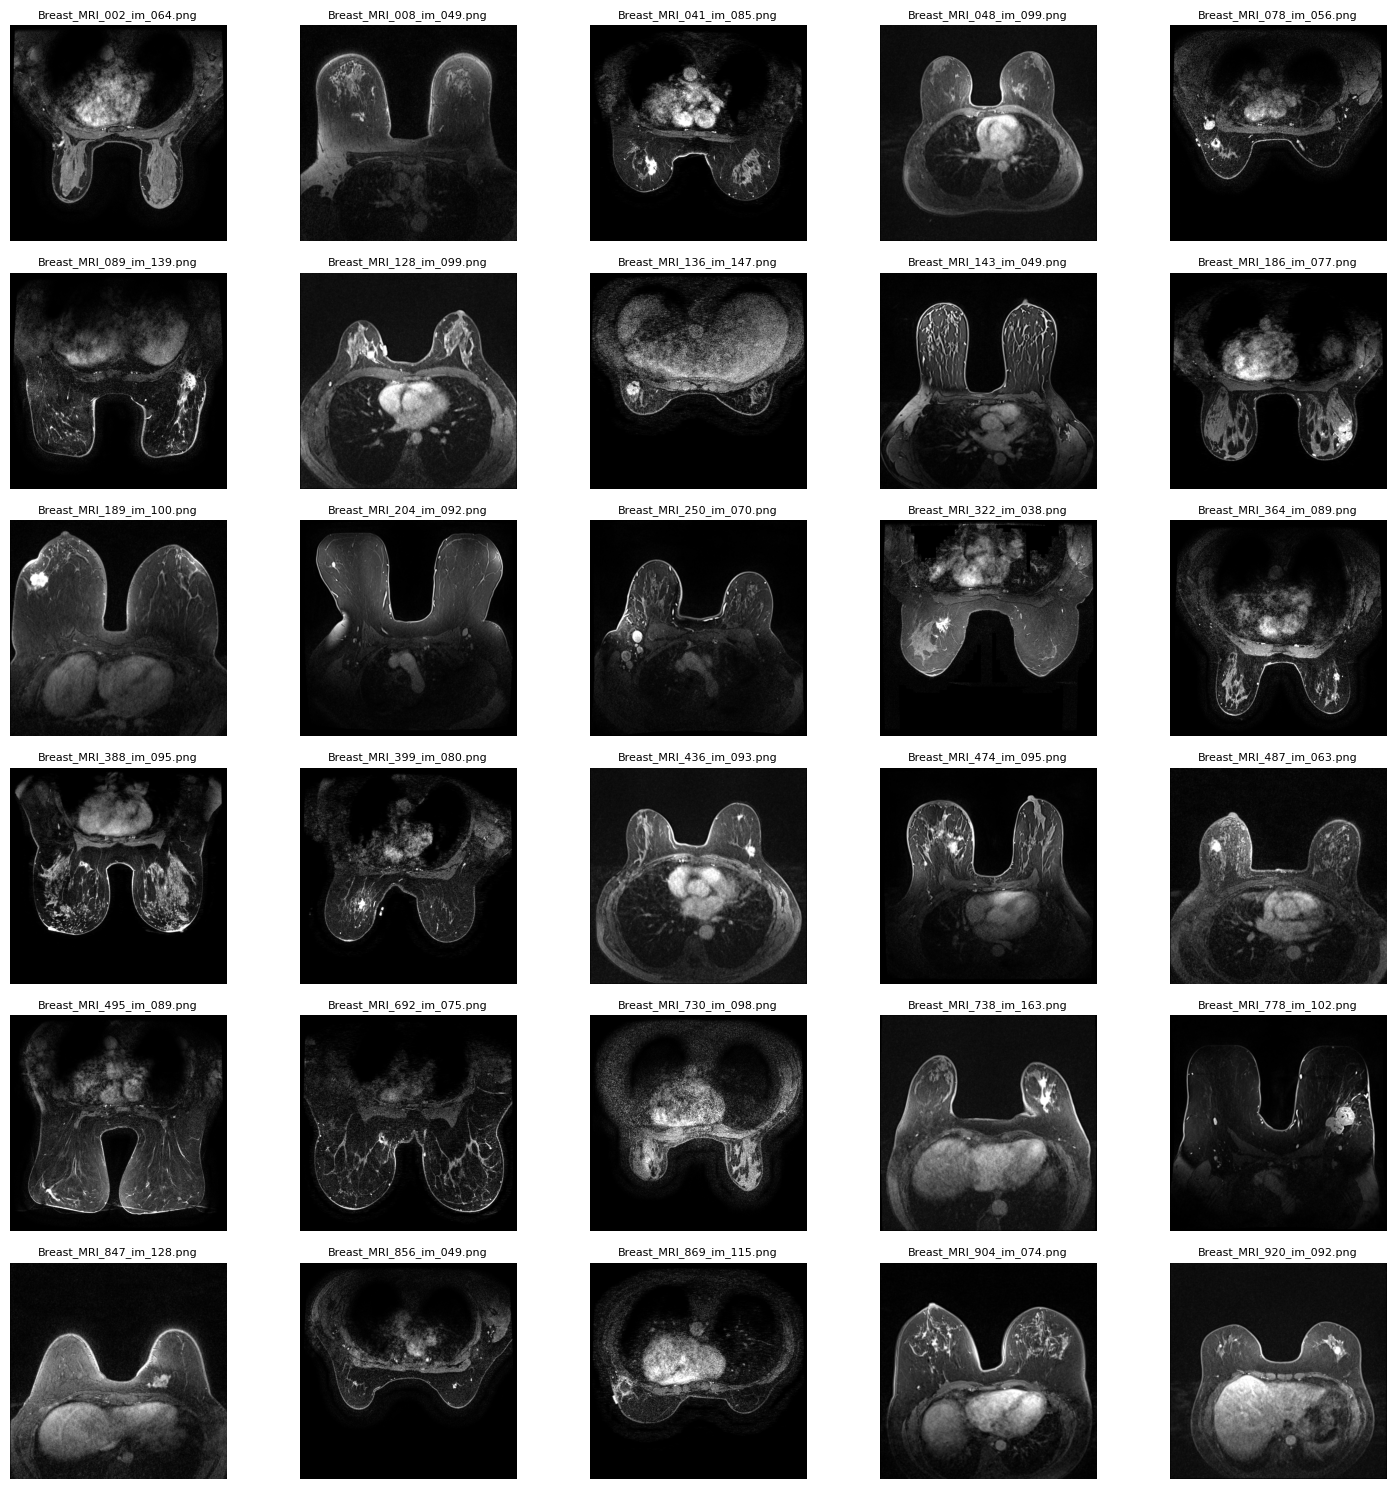

In [4]:
display_images(images_for_segmentation)

In [10]:
# NE POKRETATI - VEC ODRADJENO
#---------------------------------rucno selektovanje template-a na svakoj slici i cuvanje------------------------------
coords_data = []
output_templates = r''
for filename in os.listdir(images_path):
    if not filename.endswith(".png"):
        continue
    
    img_path = os.path.join(images_path, filename)
    img = cv2.imread(img_path)
    
    r = cv2.selectROI("Odaberi template", img)
    x, y, w, h = r
    if w > 0 and h > 0:
        coords_data.append({
            "filename": filename,
            "x": int(x), "y": int(y),
            "width": int(w), "height": int(h)
        })
        roi = img[y:y+h, x:x+w]
        cv2.imwrite(os.path.join(output_templates, f"template_{filename}"), roi)

    cv2.destroyAllWindows()
